#### Les KPIs
Les KPIs servent à déterminer le rendement d’une personne, d’une équipe ou d’une entreprise par rapport aux objectifs fixés.
Lorsque les KPIs sont clairement établis, tout le monde sait où se trouvent les priorités et objectifs et peut travailler à les atteindre pour faire avancer l’entreprise.

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [115]:
df_predictions = pd.read_csv(r'../Downloads/resto.csv')
df_predictions.head()

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
df_predictions.describe(include = 'all')

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,NaN,50,1043,78
top,NaN,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,NaN,726,134,730
mean,2310.500000,927.254868,1.075725,NaN,NaN,NaN
std,1334.400802,528.890796,0.410186,NaN,NaN,NaN
min,0.000000,1.000000,1.000000,NaN,NaN,NaN
25%,1155.250000,477.250000,1.000000,NaN,NaN,NaN
50%,2310.500000,926.000000,1.000000,NaN,NaN,NaN
75%,3465.750000,1393.000000,1.000000,NaN,NaN,NaN


### Le résumé de la dataframe colonne par colonne :

In [9]:
df_predictions.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4622.0,2310.500000,1334.400802,0.0,1155.25,2310.5,3465.75,4621.0
order_id,4622.0,927.254868,528.890796,1.0,477.25,926.0,1393.00,1834.0
quantity,4622.0,1.075725,0.410186,1.0,1.00,1.0,1.00,15.0


#### Le nombre d’items ont été commandés au total chez Chipotle est: 4622 items

###  Les colonnes du dataset sous forme d'objet list python

In [13]:
 print(df_predictions.columns.tolist()) 

['Unnamed: 0', 'order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [15]:
 print(df_predictions.columns.values)

['Unnamed: 0' 'order_id' 'quantity' 'item_name' 'choice_description'
 'item_price']


### L’item le plus commandé

###### L'item le plus commandé est Chicken Bowl

### Le total d' items chez Chipotle

In [105]:
total_item = df_predictions['item_name'].value_counts().sum()

In [111]:
f"Le total d'items ont été commandé est: {total_item} items"

"Le total d'items ont été commandé est: 4622 items"

### Chiffre d’affaire de la société

In [116]:
df_predictions['item_price'] = df_predictions['item_price'].map(lambda x: float(x. replace(x[0], "")))

In [117]:
df_predictions['item_price']


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [118]:
new_df=df_predictions.assign(Price= df_predictions['quantity'] * df_predictions['item_price'])  

In [119]:
new_df.head()

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price,Price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,1,Izze,[Clementine],3.39,3.39
2,2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [121]:
new_df.describe()


,Unnamed: 0,order_id,quantity,item_price,Price
count,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000
mean,2310.500000,927.254868,1.075725,7.464336,8.489186
std,1334.400802,528.890796,0.410186,4.245557,12.632060
min,0.000000,1.000000,1.000000,1.090000,1.090000
25%,1155.250000,477.250000,1.000000,3.390000,3.990000
50%,2310.500000,926.000000,1.000000,8.750000,8.750000
75%,3465.750000,1393.000000,1.000000,9.250000,10.980000
max,4621.000000,1834.000000,15.000000,44.250000,663.750000


In [120]:
total_revenue = (new_df["Price"]).sum()
f" Le Chiffre d’affaire de la société est: {total_revenue}$"

' Le Chiffre d’affaire de la société est: 39237.02$'

###### Le chiffre d’affaire est 39237.02$

### Le revenu moyen par commande 

In [98]:
'Le revenu moyen par commande est: %.2f$' % new_df['Price'].mean()


'Le revenu moyen par commande est: 8.49$'

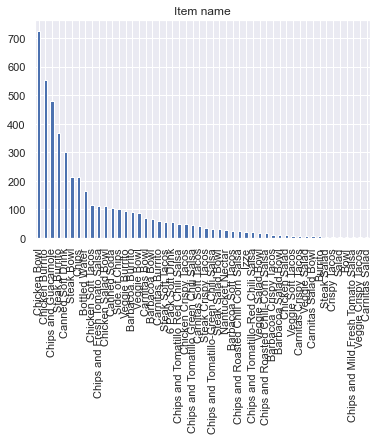

In [147]:
df_predictions['item_name'].value_counts().plot(kind='bar',title='Item name')
plt.show()

In [143]:
row50 = new_df.sample(n = 50)


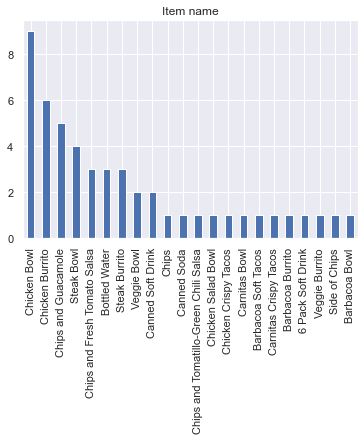

In [146]:
row50['item_name'].value_counts().plot(kind='bar',title='Item name')
plt.show()

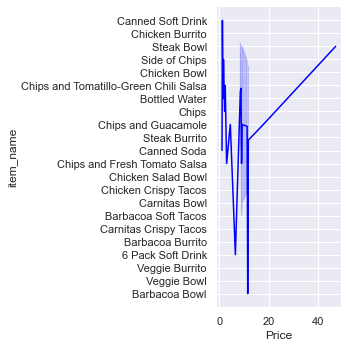

In [170]:
sns.set(style="darkgrid")
sns.relplot(y="item_name", data=row50,color="blue",x="Price", kind = 'line')


plt.show()

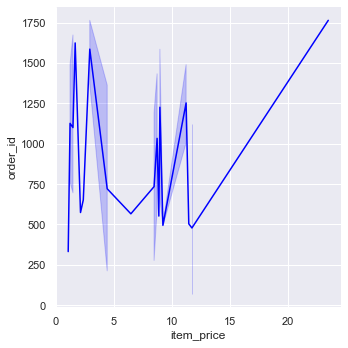

In [174]:
sns.set(style="darkgrid")
sns.relplot(x ="item_price", data=row50,color="blue",y="order_id",kind = 'line')


plt.show()

In [176]:
row50[row50['item_price'] <10]


,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price,Price
3727,3727,1489,1,Canned Soft Drink,[Diet Coke],1.25,1.25
4454,4454,1775,1,Chicken Burrito,"[Tomatillo Red Chili Salsa, [Rice, Pinto Beans...",8.75,8.75
4057,4057,1624,1,Side of Chips,NaN,1.69,1.69
449,449,195,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75,8.75
1615,1615,652,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4189,4189,1673,1,Bottled Water,NaN,1.50,1.50
1413,1413,574,1,Chips,NaN,2.15,2.15
1022,1022,420,1,Chips and Guacamole,NaN,4.45,4.45
3953,3953,1585,1,Steak Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chi...",8.99,8.99
807,807,332,1,Canned Soda,[Mountain Dew],1.09,1.09
